In [3]:
import warnings
import calendar

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from business_models import greenplum
from business_models.greenplum import GreenplumManager
from business_models import hahn

In [4]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 50)

In [16]:
data = pd.read_csv('64f866fe870d0b68533c5217.csv')
data_2 = pd.read_csv('651bf2e2bb8fce77ecadb2fe.csv')

In [30]:
data = data.append(data_2[data_2['dt']>='2023-09-05'], ignore_index=True)

/var/folders/pd/6gyyhtl13jz1jm8hyvvmc0mcsmszvt/T/ipykernel_28488/1445758830.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data_2[data_2['dt']>='2023-09-05'], ignore_index=True)


In [31]:
df = data.pivot(index='dt', columns='exp_is_bigger', values='requests').reset_index().set_index('dt')

In [32]:
df.columns = ['exp_is_not_bigger', 'exp_is_bigger']

In [33]:
df['exp_is_not_bigger_share'] = df['exp_is_not_bigger'] / (df['exp_is_not_bigger'] + df['exp_is_bigger'])
df['exp_is_bigger_share'] = 1 - df['exp_is_not_bigger_share']

In [34]:
df

,exp_is_not_bigger,exp_is_bigger,exp_is_not_bigger_share,exp_is_bigger_share
dt,,,,
2023-07-08,2636430,1407989,0.651869,0.348131
2023-07-09,2420366,1289649,0.652387,0.347613
2023-07-10,2293397,1311961,0.636108,0.363892
2023-07-11,2324156,1323655,0.637137,0.362863
2023-07-12,2308749,1322876,0.635734,0.364266
2023-07-13,2978292,1818424,0.620902,0.379098
2023-07-14,2629608,1508100,0.635523,0.364477
2023-07-15,2667669,1396414,0.656401,0.343599
2023-07-16,2425247,1272096,0.655943,0.344057


<AxesSubplot:xlabel='dt'>

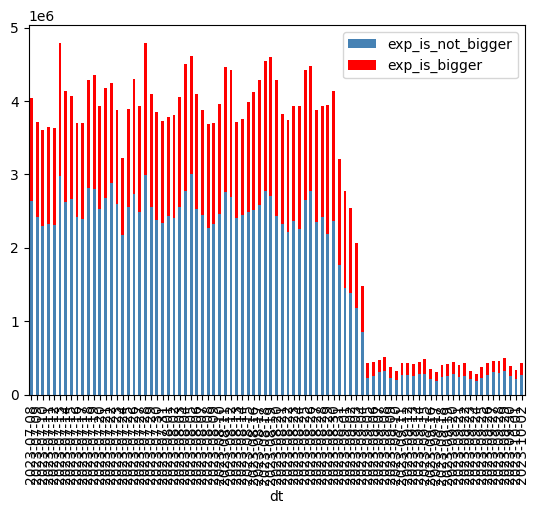

In [35]:
df[['exp_is_not_bigger', 'exp_is_bigger']].plot(kind='bar', stacked= True , color=['steelblue', 'red'])

In [36]:
df_share = df[['exp_is_not_bigger_share', 'exp_is_bigger_share']].rename(columns={'exp_is_not_bigger_share':'exp_is_not_bigger',
                                                                       'exp_is_bigger_share':'exp_is_bigger'})

In [37]:
avg_share = df.exp_is_bigger.sum() / ( df.exp_is_bigger.sum() + df.exp_is_not_bigger.sum())

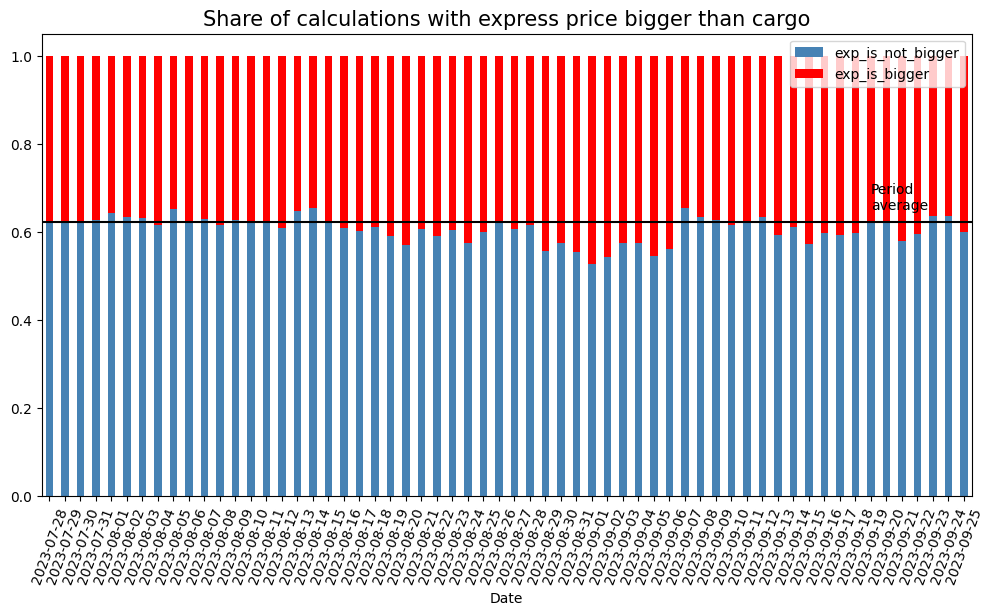

In [44]:
ax = df_share[(df_share.index < '2023-09-26')&(df_share.index >= '2023-07-28')].plot(
    kind='bar', stacked= True , color=['steelblue', 'red'])
plt.xticks(rotation=70)
ax.tick_params(axis='both', which='minor', labelsize=7)

ax.axhline(1-avg_share, color = "black")
ax.text(53, 0.65, 'Period\naverage')

ax.set(xlabel="Date")
ax.set_title(f'Share of calculations with express price bigger than cargo', fontsize=15)
ax.figure.set_size_inches(12, 6)
plt.show()

In [39]:
df_share

,exp_is_not_bigger,exp_is_bigger
dt,,
2023-07-08,0.651869,0.348131
2023-07-09,0.652387,0.347613
2023-07-10,0.636108,0.363892
2023-07-11,0.637137,0.362863
2023-07-12,0.635734,0.364266
2023-07-13,0.620902,0.379098
2023-07-14,0.635523,0.364477
2023-07-15,0.656401,0.343599
2023-07-16,0.655943,0.344057


In [41]:
df_share[df_share.index < '2023-09-26']

,exp_is_not_bigger,exp_is_bigger
dt,,
2023-07-08,0.651869,0.348131
2023-07-09,0.652387,0.347613
2023-07-10,0.636108,0.363892
2023-07-11,0.637137,0.362863
2023-07-12,0.635734,0.364266
2023-07-13,0.620902,0.379098
2023-07-14,0.635523,0.364477
2023-07-15,0.656401,0.343599
2023-07-16,0.655943,0.344057


In [51]:
df_new = df.reset_index()

In [56]:
df_new['week_num'] = pd.to_datetime(df_new['dt']).dt.isocalendar().week

In [61]:
df_new = df_new[(df_new['week_num']>27)&(df_new['week_num']<40)].groupby('week_num').agg(
    {'dt':'min','exp_is_not_bigger':'sum', 'exp_is_bigger':'sum'}).reset_index()

df_new['exp_is_not_bigger_share'] = df_new['exp_is_not_bigger'] / (df_new['exp_is_not_bigger'] + df_new['exp_is_bigger'])
df_new['exp_is_bigger_share'] = 1 - df_new['exp_is_not_bigger_share']

In [62]:
df_new

,week_num,dt,exp_is_not_bigger,exp_is_bigger,exp_is_not_bigger_share,exp_is_bigger_share
0,28,2023-07-10,17627118,9953526,0.639112,0.360888
1,29,2023-07-17,18688011,9898726,0.653730,0.346270
2,30,2023-07-24,17898518,10196226,0.637077,0.362923
3,31,2023-07-31,18053414,10535317,0.631487,0.368513
4,32,2023-08-07,17346914,10477405,0.623444,0.376556
5,33,2023-08-14,17951930,11627207,0.606912,0.393088
6,34,2023-08-21,16939428,11287120,0.600124,0.399876
7,35,2023-08-28,12779203,9829621,0.565231,0.434769
8,36,2023-09-04,2389263,1628660,0.594651,0.405349
9,37,2023-09-11,1733409,1141686,0.602905,0.397095


In [68]:
df_share_new = df_new.set_index('dt')[['exp_is_not_bigger_share', 'exp_is_bigger_share']].rename(
    columns={'exp_is_not_bigger_share':'exp_is_not_bigger', 'exp_is_bigger_share':'exp_is_bigger'})

In [69]:
df_share_new

,exp_is_not_bigger,exp_is_bigger
dt,,
2023-07-10,0.639112,0.360888
2023-07-17,0.653730,0.346270
2023-07-24,0.637077,0.362923
2023-07-31,0.631487,0.368513
2023-08-07,0.623444,0.376556
2023-08-14,0.606912,0.393088
2023-08-21,0.600124,0.399876
2023-08-28,0.565231,0.434769
2023-09-04,0.594651,0.405349


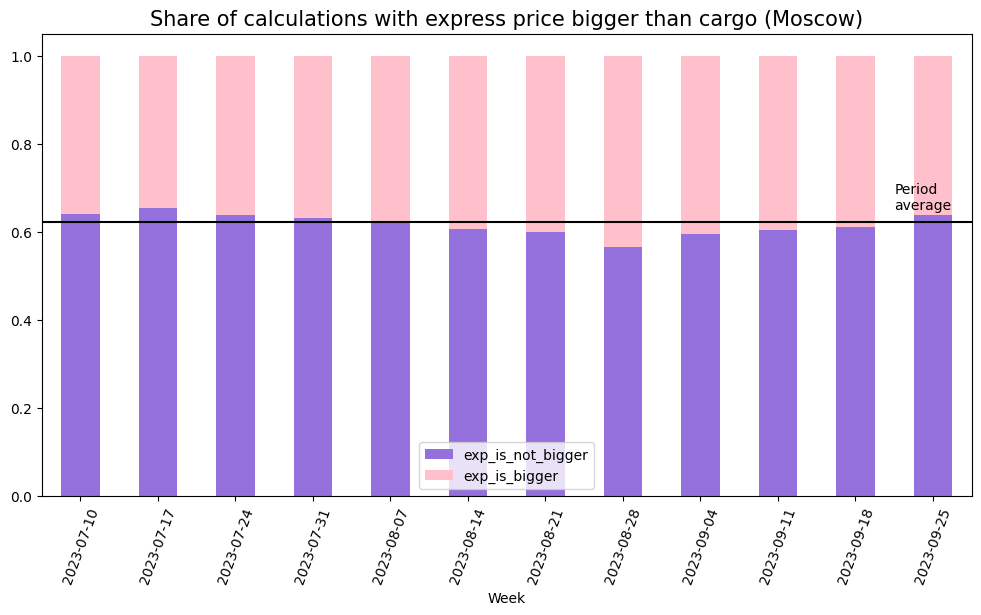

In [84]:
ax = df_share_new.plot(
    kind='bar', stacked= True
    , color=['mediumpurple', 'pink'])
plt.xticks(rotation=70)
ax.tick_params(axis='both', which='minor', labelsize=7)

ax.axhline(1-avg_share, color = "black")
ax.text(10.5, 0.65, 'Period\naverage')

ax.set(xlabel="Week")
ax.set_title(f'Share of calculations with express price bigger than cargo (Moscow)', fontsize=15)
ax.figure.set_size_inches(12, 6)
plt.show()